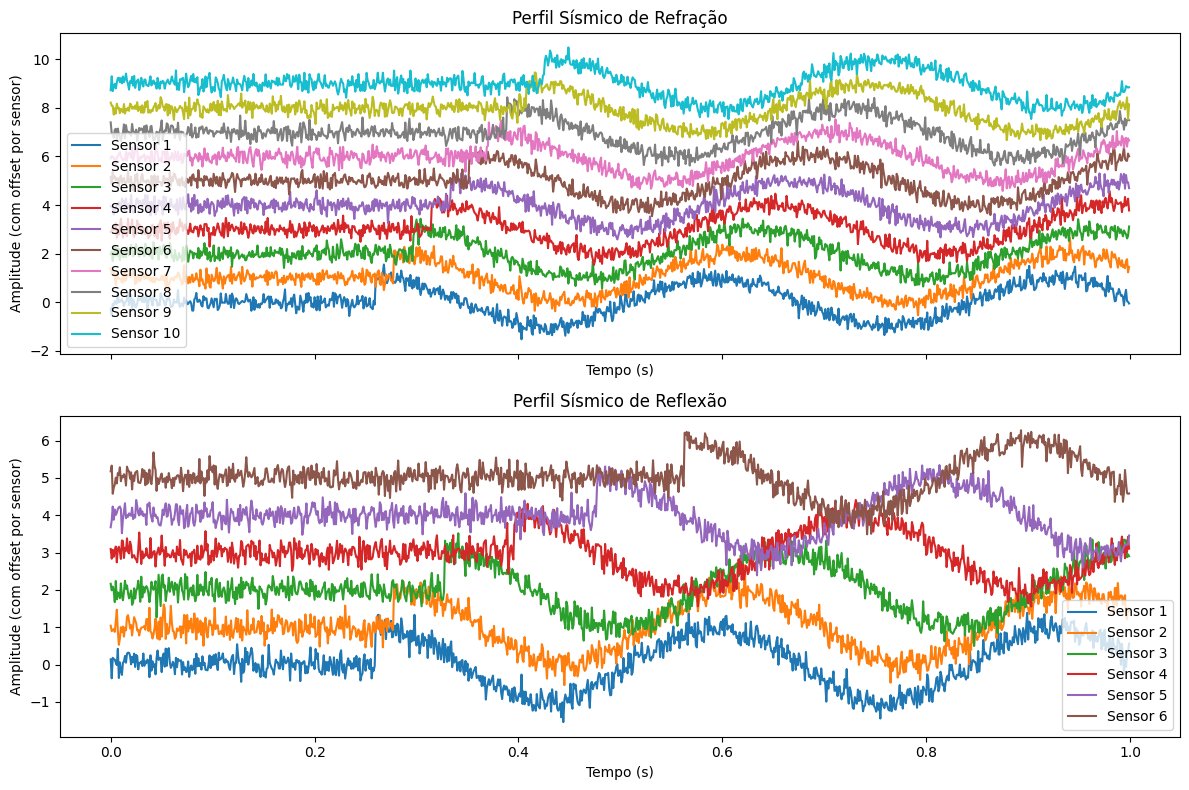

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def criar_sinais(tempos_chegada, cos_wave, t, dt, noise_level):
    sinais = []
    for t0 in tempos_chegada:
        sinal = np.zeros_like(t)
        idx = int(t0 / dt)
        if idx < len(t):
            sinal[idx:idx+len(cos_wave)] += cos_wave[:len(sinal)-idx]
        sinal += noise_level * np.random.randn(len(t))
        sinais.append(sinal)
    return np.array(sinais)

def gerar_sinal_sismico(t, freq, amplitude):
    return amplitude * np.cos(2 * np.pi * freq * t)

def calcular_perfil_reflexao(x_reflection, h, V1):
    return np.sqrt((2 * h / V1)**2 + (x_reflection / V1)**2)

def calcular_perfil_refracao(x_refraction, h, V1, V2):
    return x_refraction / V2 + 2 * h / V1

def criar_perfil_sismico(t_percurso, signal, t, dt, noise_level):
    return criar_sinais(t_percurso, signal, t, dt, noise_level)

def plotar_perfil_sismico(refraction_profile, reflection_profile, t):
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    for i, trace in enumerate(refraction_profile):
        axs[0].plot(t, trace + i, label=f"Sensor {i+1}")
    axs[0].set_title("Perfil Sísmico de Refração")
    axs[0].set_xlabel("Tempo (s)")
    axs[0].set_ylabel("Amplitude (com offset por sensor)")
    axs[0].legend()

    for i, trace in enumerate(reflection_profile):
        axs[1].plot(t, trace + i, label=f"Sensor {i+1}")
    axs[1].set_title("Perfil Sísmico de Reflexão")
    axs[1].set_xlabel("Tempo (s)")
    axs[1].set_ylabel("Amplitude (com offset por sensor)")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

fs = 1000
dt = 1 / fs
duration = 1.0
t = np.arange(0, duration, dt)
freq = 3
h = 130
V1 = 1000
V2 = 3000
amplitude = 1.0
noise_level = 0.2

signal = gerar_sinal_sismico(t, freq, amplitude)

n_sensors_refraction = 10
x_refraction = np.linspace(0, 500, n_sensors_refraction)
t_refraction = calcular_perfil_refracao(x_refraction, h, V1, V2)

refraction_profile = criar_perfil_sismico(t_refraction, signal, t, dt, noise_level)

n_sensors_reflection = 6
x_reflection = np.linspace(0, 500, n_sensors_reflection)
t_reflection = calcular_perfil_reflexao(x_reflection, h, V1)

reflection_profile = criar_perfil_sismico(t_reflection, signal, t, dt, noise_level)

plotar_perfil_sismico(refraction_profile, reflection_profile, t)